# Importing the dependencies

In [141]:
# Gym stuff
import gymnasium as gym
import gym_trading_env

# Stable baselines - rl stuff
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import A2C


# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import ta
import seaborn as sns


# Downloading the Stock Data on Daily Intervals 
    Train = 5429 days
    Test  = 311 days

In [142]:

# Define the ticker symbol
ticker = 'NFLX'

# Get historical market data
daily_data = yf.download(ticker, start='2014-01-01', end='2023-12-31')
daily_data.columns = daily_data.columns.droplevel(1)

# Rename to lowercase
daily_data = daily_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})
daily_data



[*********************100%***********************]  1 of 1 completed


Price,close,high,low,open,volume
Date,,,,,
2014-01-02,51.831429,52.511429,51.542858,52.401428,12325600
2014-01-03,51.871429,52.495712,51.842857,52.000000,10817100
2014-01-06,51.367142,52.044285,50.475716,51.889999,15501500
2014-01-07,48.500000,49.698570,48.152859,49.684284,36167600
2014-01-08,48.712856,49.425713,48.074287,48.104286,20001100
...,...,...,...,...,...
2023-12-22,486.760010,496.019989,485.450012,494.000000,2701100
2023-12-26,491.190002,491.480011,486.380005,489.390015,2034500
2023-12-27,491.790009,494.019989,489.250000,491.239990,2561300


In [143]:
# Get historical market data
test_daily_data = yf.download(ticker, start='2024-01-01', end='2025-03-29')
test_daily_data.columns = test_daily_data.columns.droplevel(1)

# Rename to lowercase
test_daily_data = test_daily_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})
test_daily_data

[*********************100%***********************]  1 of 1 completed

Price,close,high,low,open,volume
Date,,,,,
2024-01-02,468.500000,484.649994,461.859985,483.190002,5049400
2024-01-03,470.260010,475.049988,465.769989,467.320007,3443700
2024-01-04,474.670013,480.739990,466.529999,472.980011,3636500
2024-01-05,474.059998,479.549988,471.799988,476.500000,2612500
2024-01-08,485.029999,485.239990,473.649994,473.890015,3675800
...,...,...,...,...,...
2025-03-24,971.989990,977.000000,951.549988,969.669983,4677900
2025-03-25,997.280029,998.700012,977.109985,978.179993,3782200
2025-03-26,970.650024,996.789978,966.320007,993.809998,3527400


# Downloading the Stock data on Hourly Intervals 
    1. Train data = 2969 hours
    2. Test data  = 413 hours

In [144]:

# Define the ticker symbol
ticker = 'NFLX'

# Get historical market data
hourly_data = yf.download(ticker, start='2023-04-20', end='2024-12-31', interval="1h")
hourly_data.columns = hourly_data.columns.droplevel(1)

# Rename to lowercase
hourly_data = hourly_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})
hourly_data

[*********************100%***********************]  1 of 1 completed

Price,close,high,low,open,volume
Datetime,,,,,
2023-04-20 13:30:00+00:00,326.450012,328.489990,318.329987,320.390015,2701837
2023-04-20 14:30:00+00:00,326.739990,328.990387,326.000000,326.500000,1396747
2023-04-20 15:30:00+00:00,326.236908,328.049988,325.400085,326.795013,860357
2023-04-20 16:30:00+00:00,331.005005,331.429810,326.018494,326.200012,1385836
2023-04-20 17:30:00+00:00,327.720001,331.419891,327.570007,331.040009,924794
...,...,...,...,...,...
2024-12-30 16:30:00+00:00,903.715027,903.715027,896.950073,897.530029,204234
2024-12-30 17:30:00+00:00,904.905029,908.229919,903.429993,903.479980,349631
2024-12-30 18:30:00+00:00,905.761902,907.789978,903.480103,904.905029,139576


In [145]:
# Get historical market data
test_hourly_data = yf.download(ticker, start='2025-01-01', end='2025-03-29', interval="1h")
test_hourly_data.columns = test_hourly_data.columns.droplevel(1)

# Rename to lowercase
test_hourly_data = test_hourly_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})
test_hourly_data

[*********************100%***********************]  1 of 1 completed

Price,close,high,low,open,volume
Datetime,,,,,
2025-01-02 14:30:00+00:00,891.299988,898.570007,882.000000,895.000000,543214
2025-01-02 15:30:00+00:00,893.645325,894.500000,886.719971,891.469971,235998
2025-01-02 16:30:00+00:00,884.619995,894.820007,884.510010,892.729980,207185
2025-01-02 17:30:00+00:00,881.164978,884.669983,877.000000,884.299988,258705
2025-01-02 18:30:00+00:00,887.359985,887.929993,878.909973,880.669983,199156
...,...,...,...,...,...
2025-03-28 15:30:00+00:00,933.299927,947.710022,930.489990,946.957520,574296
2025-03-28 16:30:00+00:00,933.520020,936.929871,929.229980,933.289978,377044
2025-03-28 17:30:00+00:00,932.924988,936.510010,931.000122,933.094971,454840


In [146]:

# mean = data[['open', 'high', 'low', 'close', 'volume']].mean()
# std = data[['open', 'high', 'low', 'close', 'volume']].std()

# data[['open', 'high', 'low', 'close', 'volume']] = (data[['open', 'high', 'low', 'close', 'volume']] - mean) / std


# Preprocessing the data

In [147]:
# Generating features.
def preprocess(df : pd.DataFrame):
    
    df['volume'] = np.log1p(df['volume'])

    # Might Need to normalize the original columns by standardizing it. IF REQUIRED COPY THE FORMULA FROM THE ABOVE SNIPPET

    #     # Simple Moving Average (SMA)
    # df['sma_10'] = ta.trend.sma_indicator(df['close'], window=10)
    # df['sma_20'] = ta.trend.sma_indicator(df['close'], window=20)

    # # Exponential Moving Average (EMA)
    # df['ema_10'] = ta.trend.ema_indicator(df['close'], window=10)

    # # RSI (Relative Strength Index)
    # df['rsi'] = ta.momentum.rsi(df['close'], window=14)

    # # MACD: Get MACD, Signal, and Diff (MACD histogram)
    # macd = ta.trend.MACD(close=df['close'])
    # df['macd'] = macd.macd()
    # df['macd_signal'] = macd.macd_signal()
    # df['macd_diff'] = macd.macd_diff()

    #Feature Engineering
    df["feature_close"] = df["close"].pct_change()
    df["feature_open"] = df["open"]/df["close"].shift(1)
    df["feature_high"] = df["high"]/df["close"]
    df["feature_low"] = df["low"]/df["close"]


    return df



In [148]:
daily_data = preprocess(daily_data)
daily_data = daily_data.dropna()

test_daily_data = preprocess(test_daily_data)
test_daily_data = test_daily_data.dropna()

hourly_data = preprocess(hourly_data)
hourly_data = hourly_data.dropna()


test_hourly_data = preprocess(test_hourly_data)
test_hourly_data = test_hourly_data.dropna()

In [149]:
daily_data

Price,close,high,low,open,volume,feature_close,feature_open,feature_high,feature_low
Date,,,,,,,,,
2014-01-03,51.871429,52.495712,51.842857,52.000000,16.196639,0.000772,1.003252,1.012035,0.999449
2014-01-06,51.367142,52.044285,50.475716,51.889999,16.556447,-0.009722,1.000358,1.013182,0.982646
2014-01-07,48.500000,49.698570,48.152859,49.684284,17.403674,-0.055817,0.967239,1.024713,0.992842
2014-01-08,48.712856,49.425713,48.074287,48.104286,16.811298,0.004389,0.991841,1.014634,0.986891
2014-01-09,48.150002,49.139999,47.857143,48.824287,16.649147,-0.011555,1.002288,1.020561,0.993918
...,...,...,...,...,...,...,...,...,...
2023-12-22,486.760010,496.019989,485.450012,494.000000,14.809170,-0.009865,1.004862,1.019024,0.997309
2023-12-26,491.190002,491.480011,486.380005,489.390015,14.525761,0.009101,1.005403,1.000590,0.990207
2023-12-27,491.790009,494.019989,489.250000,491.239990,14.756026,0.001222,1.000102,1.004534,0.994835


# Environment

In [ ]:
env = gym.make("TradingEnv",
        name= "Netflix_USD",
        df = daily_data, 
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.005/100, # 0.005% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0001/100, # 0.0001% per timestep (one timestep = 1h here)
        windows =15
    )



In [175]:
# Run an episode until it ends :
done, truncated = False, False
observation, info = env.reset()
while not done and not truncated:
    # Pick a position by its index in your position list (=[-1, 0, 1])....usually something like : position_index = your_policy(observation)
    position_index = env.action_space.sample() # At every timestep, pick a random position index from your position list (=[-1, 0, 1])
    observation, reward, done, truncated, info = env.step(position_index)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log method

# Single dataset model

### 1.DQN Model

In [ ]:
# Define a function to train a DQN model with different hyperparameters
def train_dqn(env, policy, learning_rate=5e-5, buffer_size=100, batch_size=32, gamma=0.99, 
              tau=1.0, train_freq=4, target_update_interval=400, exploration_fraction=0.2, 
              exploration_final_eps=0.02, total_timesteps=1000000, verbose=1):
    
    # Wrap the environment for vectorized training
    vec_env = make_vec_env(lambda: env, n_envs=1)

    # Initialize DQN model with given policy and hyperparameters
    model = DQN(policy, vec_env, learning_rate=learning_rate, buffer_size=buffer_size, 
                batch_size=batch_size, gamma=gamma, tau=tau, train_freq=train_freq, 
                target_update_interval=target_update_interval, exploration_fraction=exploration_fraction, 
                exploration_final_eps=exploration_final_eps, verbose=verbose)
    
    # Train the model
    model.learn(total_timesteps=total_timesteps)
    
    return model

In [110]:
# Define different policies to test
policies = ["MlpPolicy"]

# Train and store results
models = {}
for policy in policies:
    print(f"Training DQN with policy: {policy}")
    
    models[policy] = train_dqn(env, policy , total_timesteps = 1000000)
    
    # Save the model
    models[policy].save(f"{policy}_dqn_daily_trading_1Mil")
    print(f"Training completed and model saved as '{policy}_dqn_daily_trading'.")

Training DQN with policy: MlpPolicy
Using cpu device
Market Return : 749.41%   |   Portfolio Return : 25.87%   |   
Market Return : 749.41%   |   Portfolio Return : -85.28%   |   
Market Return : 749.41%   |   Portfolio Return : -72.63%   |   
Market Return : 749.41%   |   Portfolio Return : 388.68%   |   
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.42e+03 |
|    ep_rew_mean      | -0.349   |
|    exploration_rate | 0.953    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1496     |
|    time_elapsed     | 6        |
|    total_timesteps  | 9660     |
| train/              |          |
|    learning_rate    | 5e-05    |
|    loss             | 0.000225 |
|    n_updates        | 2389     |
----------------------------------
Market Return : 749.41%   |   Portfolio Return : 37.89%   |   
Market Return : 749.41%   |   Portfolio Return : -70.44%   |   
Market Return : 749.41%   |   Portfolio 

In [154]:
def evaluate_trading_strategy(model, env, num_episodes=100):
    """
    Runs the trained model in the environment and logs key performance metrics.
    """
    market_returns = []
    portfolio_returns = []
    sharpe_ratios = []
    sortino_ratios = []
    max_drawdowns = []
    win_loss_ratios = []
    volatilities = []

    portfolio_val_all = []
    market_val_all = []
    rewards_all = []
    
    

    for _ in range(num_episodes):
        obs = env.reset()
        done = False
        portfolio_values = []
        market_values = []
        rewards = []
        initial_price = None
        
        
        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, info = env.step(action)
            portfolio_values.append(info[0]['portfolio_valuation'])

            if initial_price is None:
                initial_price = info[0]['data_close']  # Save first closing price

            market_value = (info[0]['data_close'] / initial_price) * 1000
            market_values.append(market_value)
            
            rewards.append(reward)
        
        # Save trends
        portfolio_val_all.append(portfolio_values)
        market_val_all.append(market_values)
        rewards_all.append(rewards)

        # Calculate metrics
        portfolio_return = (portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0] * 100
        market_return = (market_values[-1] - market_values[0]) / market_values[0] * 100
        sharpe_ratio = np.mean(rewards) / np.std(rewards) if np.std(rewards) > 0 else 0
        sortino_ratio = np.mean(rewards) / np.std([r for r in rewards if r < 0]) if len([r for r in rewards if r < 0]) > 0 else 0
        max_drawdown = min(portfolio_values) / max(portfolio_values) - 1
        win_loss_ratio = sum(np.array(rewards) > 0) / sum(np.array(rewards) <= 0) if sum(np.array(rewards) <= 0) > 0 else 0
        volatility = np.std(rewards)

        # Store results
        portfolio_returns.append(portfolio_return)
        market_returns.append(market_return)
        sharpe_ratios.append(sharpe_ratio)
        sortino_ratios.append(sortino_ratio)
        max_drawdowns.append(max_drawdown)
        win_loss_ratios.append(win_loss_ratio)
        volatilities.append(volatility)


        # --- Plotting ---
    sns.set(style='darkgrid')
    
    # 1. Portfolio vs Market Value Plot (first episode only)
    plt.figure(figsize=(12, 5))
    plt.plot(portfolio_val_all[0], label='Portfolio Value')
    plt.plot(market_val_all[0], label='Market Value')
    plt.title("Portfolio vs Market Value (Episode 1)")
    plt.xlabel("Timesteps")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 2. Cumulative Reward Curve (first episode)
    plt.figure(figsize=(10, 4))
    plt.plot(np.cumsum(rewards_all[0]), label='Cumulative Reward')
    plt.title("Cumulative Reward Over Time (Episode 1)")
    plt.xlabel("Timesteps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3. Distribution of performance metrics
    metric_data = {
        'Portfolio Return (%)': portfolio_returns,
        'Market Return (%)': market_returns,
        'Sharpe Ratio': sharpe_ratios,
        'Sortino Ratio': sortino_ratios,
        'Max Drawdown (%)': [d * 100 for d in max_drawdowns],
        'Win/Loss Ratio': win_loss_ratios,
        'Volatility': volatilities
    }

    for key, values in metric_data.items():
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=values)
        plt.title(f"{key} Distribution Over {num_episodes} Episodes")
        plt.xlabel(key)
        plt.tight_layout()
        plt.show()

    # Return metrics
    return {
        "Portfolio Return (%)": np.mean(portfolio_returns),
        "Market Return (%)": np.mean(market_returns),
        "Sharpe Ratio": np.mean(sharpe_ratios),
        "Sortino Ratio": np.mean(sortino_ratios),
        "Max Drawdown (%)": np.mean(max_drawdowns) * 100,
        "Win/Loss Ratio": np.mean(win_loss_ratios),
        "Volatility": np.mean(volatilities)
    }

In [155]:
# Load trained model
DQN_MLP_model = DQN.load("MlpPolicy_dqn_daily_trading_1Mil")

print(DQN_MLP_model)

In [158]:
Test_env = gym.make("TradingEnv",
        name= "Netflix_USD",
        df = test_daily_data, 
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.005/100, # 0.005% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0001/100, # 0.0001% per timestep (one timestep = 1h here)
        windows = 100
    )


# Wrap the environment for vectorized training
Test_vec_env = make_vec_env(lambda: Test_env, n_envs=1)

Evaluating DQN model with MlpPolicy
Market Return : 44.39%   |   Portfolio Return : -13.78%   |   
Market Return : 44.39%   |   Portfolio Return : 35.19%   |   
Market Return : 44.39%   |   Portfolio Return : -6.96%   |   
Market Return : 44.39%   |   Portfolio Return : -25.55%   |   
Market Return : 44.39%   |   Portfolio Return : -18.91%   |   
Market Return : 44.39%   |   Portfolio Return : 27.18%   |   
Market Return : 44.39%   |   Portfolio Return : -17.36%   |   
Market Return : 44.39%   |   Portfolio Return :  0.20%   |   
Market Return : 44.39%   |   Portfolio Return : -26.21%   |   
Market Return : 44.39%   |   Portfolio Return : -16.94%   |   
Market Return : 44.39%   |   Portfolio Return : -1.00%   |   
Market Return : 44.39%   |   Portfolio Return : -13.88%   |   
Market Return : 44.39%   |   Portfolio Return : -6.89%   |   
Market Return : 44.39%   |   Portfolio Return :  7.02%   |   
Market Return : 44.39%   |   Portfolio Return : -14.00%   |   
Market Return : 44.39%   |

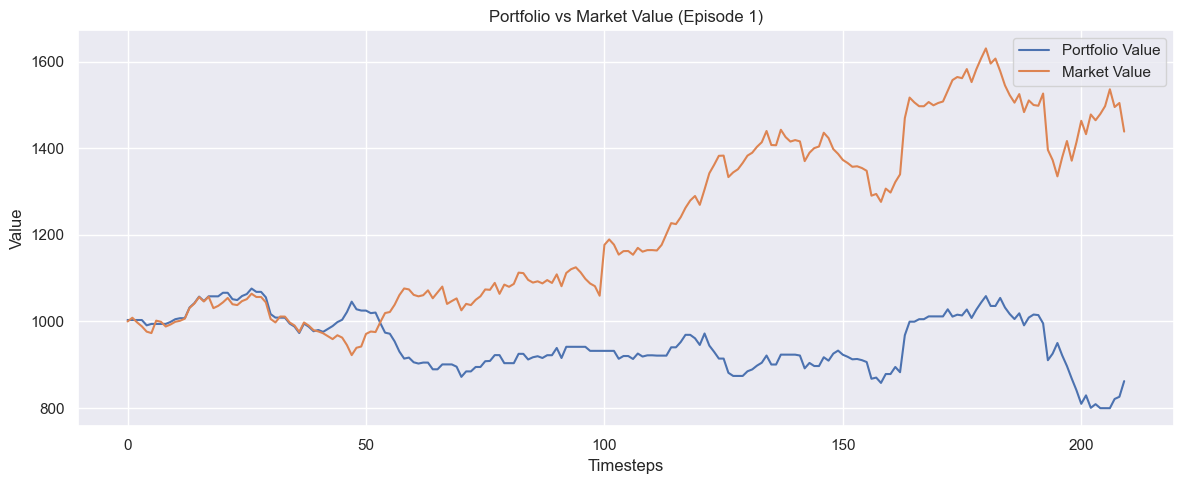

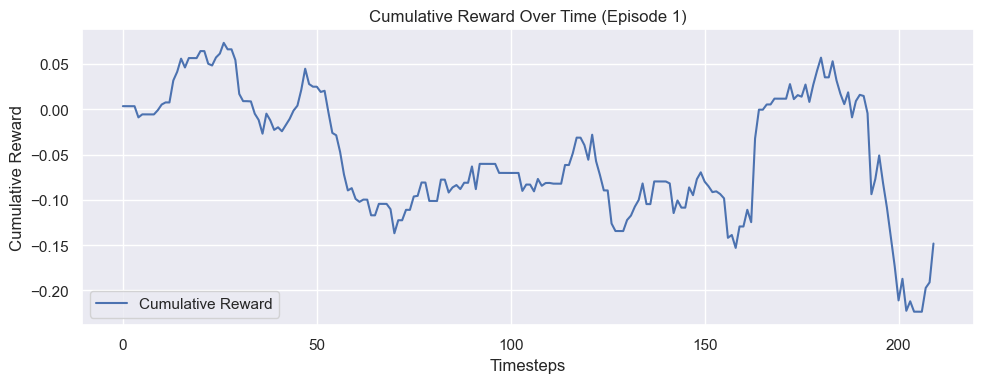

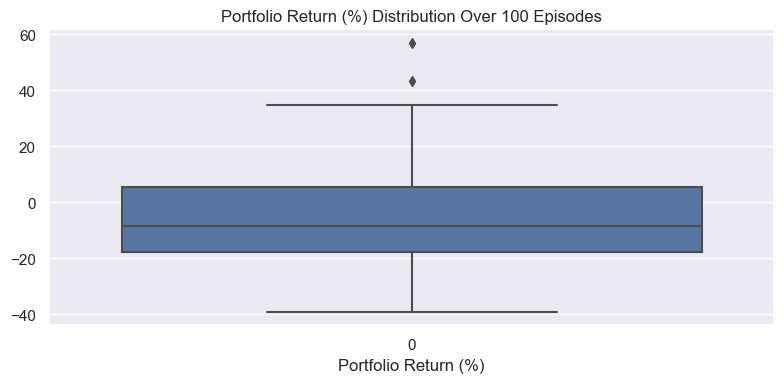

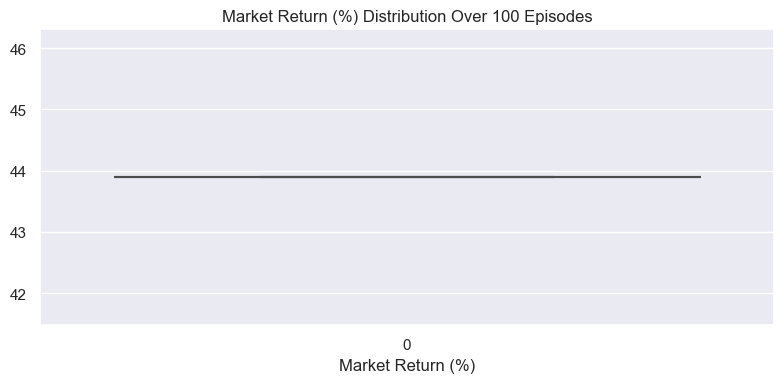

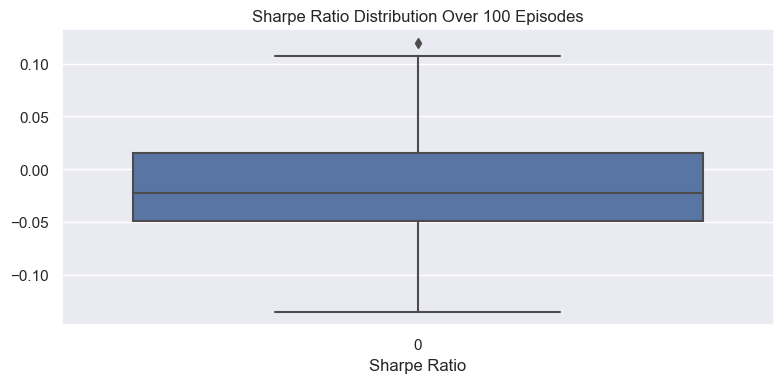

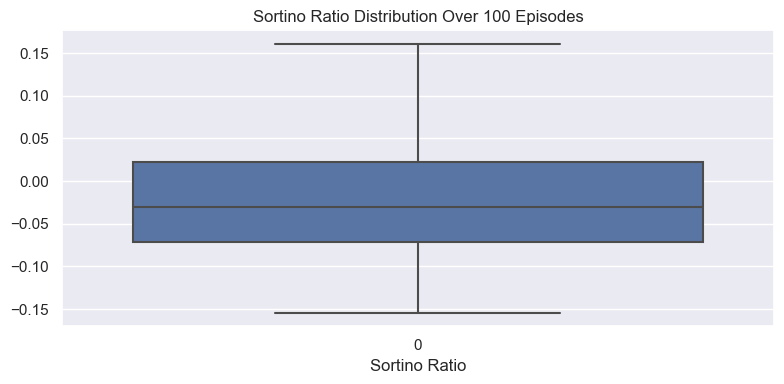

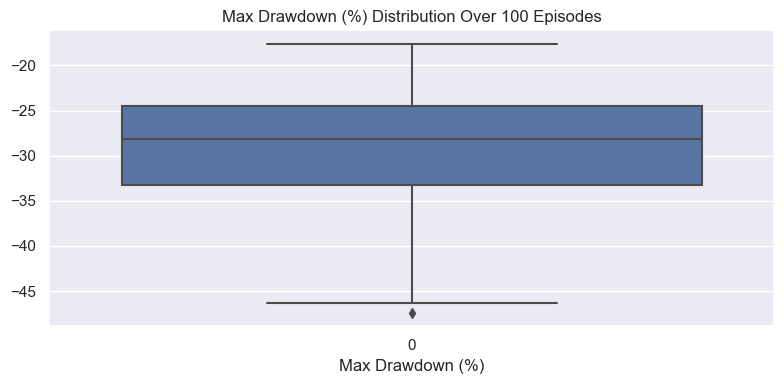

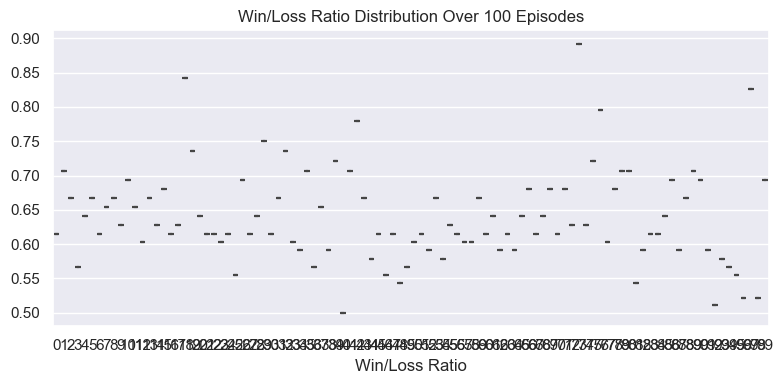

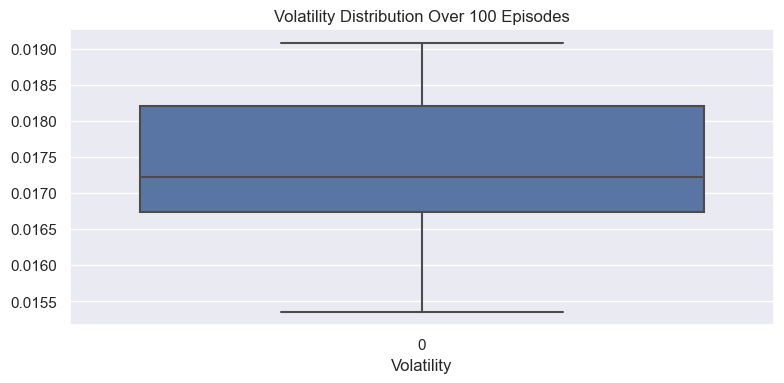

           Portfolio Return (%)  Market Return (%)  Sharpe Ratio  \
MlpPolicy             -4.468916          43.890597     -0.015866   

           Sortino Ratio  Max Drawdown (%)  Win/Loss Ratio  Volatility  
MlpPolicy      -0.018815         -29.11248        0.639626    0.017408  


In [159]:
# Store results for each policy
results = {}
policy = "MlpPolicy"
print(f"Evaluating DQN model with {policy}")
results[policy] = evaluate_trading_strategy(DQN_MLP_model, Test_vec_env)

# Convert results into a dataframe
df_results = pd.DataFrame(results).T
print(df_results)

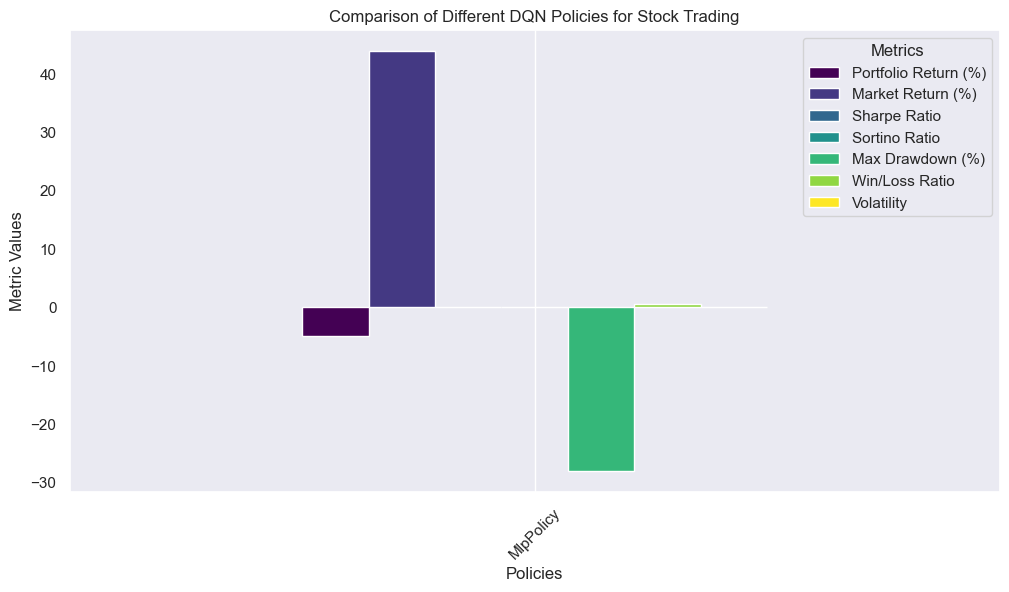

In [129]:
# Plotting the performance of different policies
metrics = ["Portfolio Return (%)", "Market Return (%)", "Sharpe Ratio", 
           "Sortino Ratio", "Max Drawdown (%)", "Win/Loss Ratio", "Volatility"]

df_results[metrics].plot(kind="bar", figsize=(12, 6), colormap="viridis", rot=45)
plt.title("Comparison of Different DQN Policies for Stock Trading")
plt.ylabel("Metric Values")
plt.xlabel("Policies")
plt.legend(title="Metrics")
plt.grid(axis="y")
plt.show()


# Hourly 

In [ ]:
env = gym.make("TradingEnv",
        name= "Netflix_USD",
        df = hourly_data, 
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.005/100, # 0.005% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0001/100, # 0.0001% per timestep (one timestep = 1h here)
    )

In [19]:
# Define different policies to test
policies = ["MlpPolicy"]

# Train and store results
models = {}
for policy in policies:
    print(f"Training DQN with policy: {policy}")
    
    models[policy] = train_dqn(env, policy , total_timesteps = 500000)
    
    # Save the model
    models[policy].save(f"{policy}_dqn_hourly_trading")
    print(f"Training completed and model saved as '{policy}_dqn_hourly_trading'.")

Training DQN with policy: MlpPolicy
Using cpu device
Market Return : 175.48%   |   Portfolio Return : -4.71%   |   
Market Return : 175.48%   |   Portfolio Return : -56.02%   |   
Market Return : 175.48%   |   Portfolio Return : 19.05%   |   
Market Return : 175.48%   |   Portfolio Return : 46.96%   |   
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.97e+03 |
|    ep_rew_mean      | -0.0776  |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1890     |
|    time_elapsed     | 6        |
|    total_timesteps  | 11868    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 1.12e-05 |
|    n_updates        | 2941     |
----------------------------------
Market Return : 175.48%   |   Portfolio Return : -28.53%   |   
Market Return : 175.48%   |   Portfolio Return : -40.03%   |   
Market Return : 175.48%   |   Portfolio R

In [ ]:
# Load trained model
DQN_MLP_model = DQN.load("MlpPolicy_dqn_hourly_trading")

print(DQN_MLP_model)

FileNotFoundError: [Errno 2] No such file or directory: 'MlpPolicy_dqn_hourly_trading_1Mil.zip'

In [21]:
Test_env = gym.make("TradingEnv",
        name= "Netflix_USD",
        df = test_hourly_data, 
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.005/100, # 0.005% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0001/100, # 0.0001% per timestep (one timestep = 1h here)
    )


# Wrap the environment for vectorized training
Test_vec_env = make_vec_env(lambda: Test_env, n_envs=1)

In [22]:
# Store results for each policy
results = {}
policy = "MlpPolicy"
print(f"Evaluating DQN model with {policy}")
results[policy] = evaluate_trading_strategy(DQN_MLP_model, Test_vec_env)

# Convert results into a dataframe
df_results = pd.DataFrame(results).T
print(df_results)

Evaluating DQN model with MlpPolicy
Market Return :  4.47%   |   Portfolio Return : -9.75%   |   
Market Return :  4.47%   |   Portfolio Return : -9.12%   |   
Market Return :  4.47%   |   Portfolio Return : -13.01%   |   
Market Return :  4.47%   |   Portfolio Return : -8.70%   |   
Market Return :  4.47%   |   Portfolio Return : -14.42%   |   
Market Return :  4.47%   |   Portfolio Return : -4.99%   |   
Market Return :  4.47%   |   Portfolio Return : -4.16%   |   
Market Return :  4.47%   |   Portfolio Return : -4.97%   |   
Market Return :  4.47%   |   Portfolio Return : -1.33%   |   
Market Return :  4.47%   |   Portfolio Return : -5.26%   |   
           Portfolio Return (%)  Market Return (%)  Sharpe Ratio  \
MlpPolicy             -8.489721           5.533451      -0.01915   

           Sortino Ratio  Max Drawdown (%)  Win/Loss Ratio  Volatility  
MlpPolicy      -0.019787        -23.336352        0.923449    0.010053  


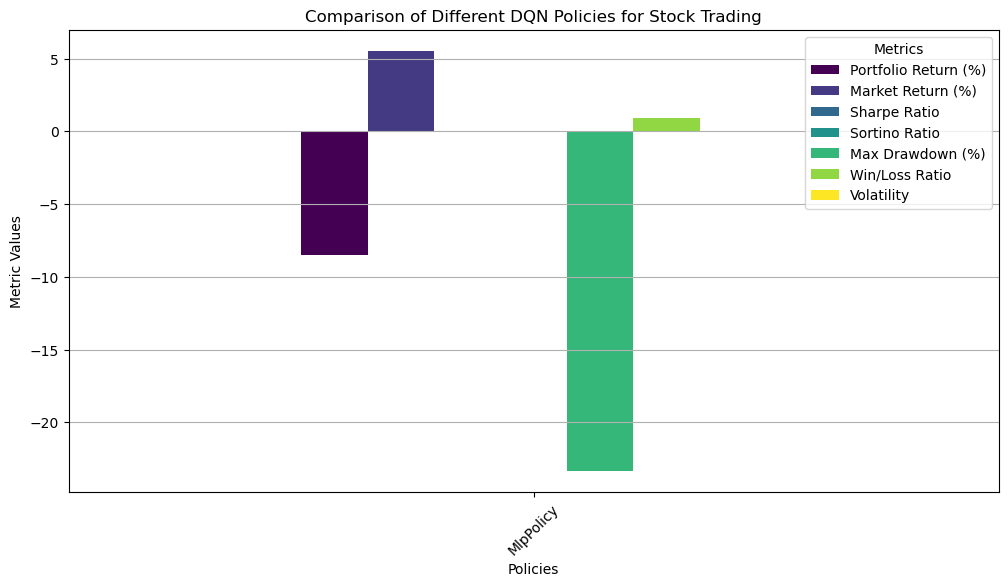

In [23]:
# Plotting the performance of different policies
metrics = ["Portfolio Return (%)", "Market Return (%)", "Sharpe Ratio", 
           "Sortino Ratio", "Max Drawdown (%)", "Win/Loss Ratio", "Volatility"]

df_results[metrics].plot(kind="bar", figsize=(12, 6), colormap="viridis", rot=45)
plt.title("Comparison of Different DQN Policies for Stock Trading")
plt.ylabel("Metric Values")
plt.xlabel("Policies")
plt.legend(title="Metrics")
plt.grid(axis="y")
plt.show()

# 2. PPO model

In [24]:
env = gym.make("TradingEnv",
        name= "Netflix_USD",
        df = daily_data, 
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.005/100, # 0.005% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0001/100, # 0.0001% per timestep (one timestep = 1h here)
    )

In [25]:
# Define a function to train a DQN model with different hyperparameters
def train_ppo(env, policy,learning_rate=0.0003, n_steps=2048, batch_size=64, n_epochs=10, gamma=0.99, gae_lambda=0.95, clip_range=0.2, ent_coef=0.01, total_timesteps=10000, verbose=1):
    
    # Wrap the environment for vectorized training
    vec_env = make_vec_env(lambda: env, n_envs=1)

    # Initialize DQN model with given policy and hyperparameters
    model = PPO(policy, vec_env, learning_rate=learning_rate, 
                n_steps=n_steps, batch_size=batch_size, n_epochs=n_epochs, gamma=gamma, gae_lambda=gae_lambda, clip_range=clip_range, ent_coef=ent_coef, verbose=verbose)
    
    # Train the model
    model.learn(total_timesteps=total_timesteps)
    
    return model

In [26]:
# Define different policies to test
policies = ["MlpPolicy"]

# Train and store results
ppo_models = {}
for policy in policies:
    print(f"Training PPO with policy: {policy}")
    
    ppo_models[policy] = train_ppo(env, policy , total_timesteps = 500000)
    
    # Save the model
    ppo_models[policy].save(f"{policy}_ppo_daily_trading")
    print(f"Training completed and model saved as '{policy}_ppo_daily_trading'.")

Training PPO with policy: MlpPolicy
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1621 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
Market Return : 838.63%   |   Portfolio Return : -80.60%   |   
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.51e+03    |
|    ep_rew_mean          | -1.64       |
| time/                   |             |
|    fps                  | 1250        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011711005 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -1.48       |
|    learning_rate        | 0.0003      |
|

In [27]:
# Load trained model
PPO_MLP_model = PPO.load("MlpPolicy_ppo_daily_trading")

print(PPO_MLP_model)

In [28]:
Test_env = gym.make("TradingEnv",
        name= "Netflix_USD",
        df = test_daily_data, 
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.005/100, # 0.005% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0001/100, # 0.0001% per timestep (one timestep = 1h here)
    )


# Wrap the environment for vectorized training
Test_vec_env = make_vec_env(lambda: Test_env, n_envs=1)

In [29]:
# Store results for each policy
results = {}
policy = "MlpPolicy"
print(f"Evaluating PPO model with {policy}")
results[policy] = evaluate_trading_strategy(PPO_MLP_model, Test_vec_env)

# Convert results into a dataframe
df_results = pd.DataFrame(results).T
print(df_results)



Evaluating PPO model with MlpPolicy
Market Return : 98.58%   |   Portfolio Return : 30.89%   |   
Market Return : 98.58%   |   Portfolio Return : 42.50%   |   
Market Return : 98.58%   |   Portfolio Return : 48.24%   |   
Market Return : 98.58%   |   Portfolio Return : 123.07%   |   
Market Return : 98.58%   |   Portfolio Return : 89.84%   |   
Market Return : 98.58%   |   Portfolio Return : 72.02%   |   
Market Return : 98.58%   |   Portfolio Return : 114.30%   |   
Market Return : 98.58%   |   Portfolio Return : 95.58%   |   
Market Return : 98.58%   |   Portfolio Return : 96.48%   |   
Market Return : 98.58%   |   Portfolio Return : 95.13%   |   
           Portfolio Return (%)  Market Return (%)  Sharpe Ratio  \
MlpPolicy             80.054659           96.73667      0.100913   

           Sortino Ratio  Max Drawdown (%)  Win/Loss Ratio  Volatility  
MlpPolicy       0.144855        -49.320257        0.829998    0.018513  


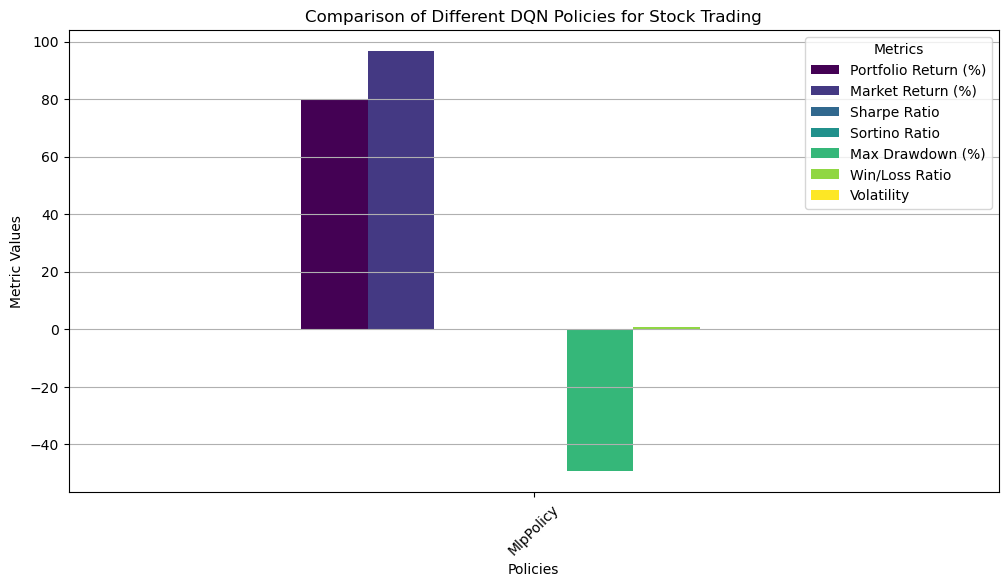

In [30]:
# Plotting the performance of different policies
metrics = ["Portfolio Return (%)", "Market Return (%)", "Sharpe Ratio", 
           "Sortino Ratio", "Max Drawdown (%)", "Win/Loss Ratio", "Volatility"]

df_results[metrics].plot(kind="bar", figsize=(12, 6), colormap="viridis", rot=45)
plt.title("Comparison of Different DQN Policies for Stock Trading")
plt.ylabel("Metric Values")
plt.xlabel("Policies")
plt.legend(title="Metrics")
plt.grid(axis="y")
plt.show()

In [31]:
env = gym.make("TradingEnv",
        name= "Netflix_USD",
        df = hourly_data, 
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.005/100, # 0.005% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0001/100, # 0.0001% per timestep (one timestep = 1h here)
    )

In [32]:
# Define different policies to test
policies = ["MlpPolicy"]

# Train and store results
ppo_models = {}
for policy in policies:
    print(f"Training PPO with policy: {policy}")
    
    ppo_models[policy] = train_ppo(env, policy , total_timesteps = 500000)
    
    # Save the model
    ppo_models[policy].save(f"{policy}_ppo_hourly_trading")
    print(f"Training completed and model saved as '{policy}_ppo_hourly_trading'.")

Training PPO with policy: MlpPolicy
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1706 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
Market Return : 175.48%   |   Portfolio Return : -26.70%   |   
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.97e+03    |
|    ep_rew_mean          | -0.311      |
| time/                   |             |
|    fps                  | 1286        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009441565 |
|    clip_fraction        | 0.0239      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -16.4       |
|    learning_rate        | 0.0003      |
|

In [33]:
# Load trained model
PPO_MLP_model = PPO.load("MlpPolicy_ppo_hourly_trading")

print(PPO_MLP_model)

In [34]:
Test_env = gym.make("TradingEnv",
        name= "Netflix_USD",
        df = test_hourly_data, 
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.005/100, # 0.005% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0001/100, # 0.0001% per timestep (one timestep = 1h here)
    )


# Wrap the environment for vectorized training
Test_vec_env = make_vec_env(lambda: Test_env, n_envs=1)

In [35]:
# Store results for each policy
results = {}
policy = "MlpPolicy"
print(f"Evaluating PPO model with {policy}")
results[policy] = evaluate_trading_strategy(PPO_MLP_model, Test_vec_env)

# Convert results into a dataframe
df_results = pd.DataFrame(results).T
print(df_results)



Evaluating PPO model with MlpPolicy
Market Return :  4.47%   |   Portfolio Return : 11.50%   |   
Market Return :  4.47%   |   Portfolio Return :  4.90%   |   
Market Return :  4.47%   |   Portfolio Return : 11.93%   |   
Market Return :  4.47%   |   Portfolio Return :  3.72%   |   
Market Return :  4.47%   |   Portfolio Return : -2.77%   |   
Market Return :  4.47%   |   Portfolio Return :  3.38%   |   
Market Return :  4.47%   |   Portfolio Return :  2.83%   |   
Market Return :  4.47%   |   Portfolio Return :  3.47%   |   
Market Return :  4.47%   |   Portfolio Return :  0.27%   |   
Market Return :  4.47%   |   Portfolio Return : -1.80%   |   
           Portfolio Return (%)  Market Return (%)  Sharpe Ratio  \
MlpPolicy              4.598899           5.533451      0.009228   

           Sortino Ratio  Max Drawdown (%)  Win/Loss Ratio  Volatility  
MlpPolicy       0.013696        -20.958383        1.009212     0.00944  


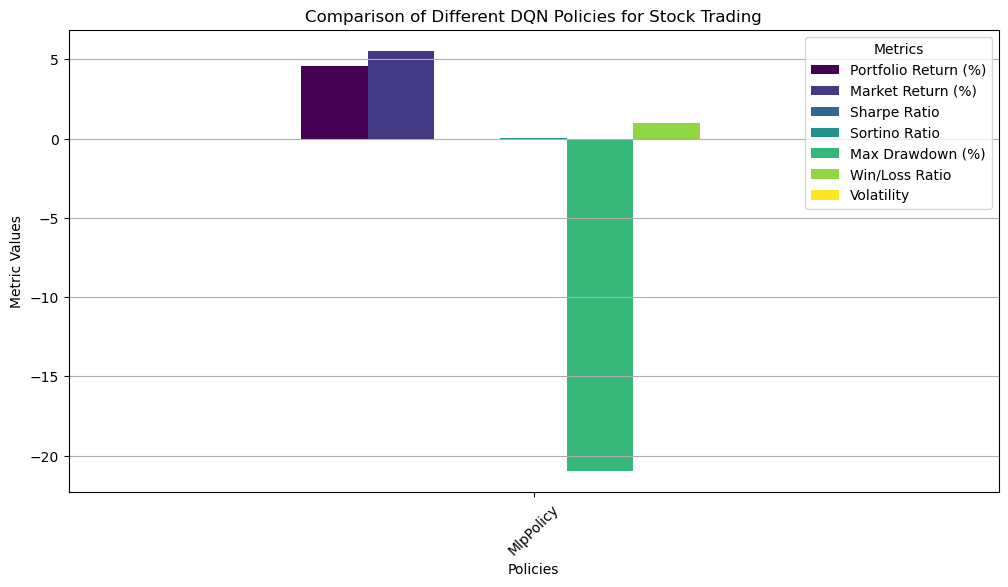

In [36]:
# Plotting the performance of different policies
metrics = ["Portfolio Return (%)", "Market Return (%)", "Sharpe Ratio", 
           "Sortino Ratio", "Max Drawdown (%)", "Win/Loss Ratio", "Volatility"]

df_results[metrics].plot(kind="bar", figsize=(12, 6), colormap="viridis", rot=45)
plt.title("Comparison of Different DQN Policies for Stock Trading")
plt.ylabel("Metric Values")
plt.xlabel("Policies")
plt.legend(title="Metrics")
plt.grid(axis="y")
plt.show()